In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
transaction = pd.read_csv('transactions.csv')
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [4]:
transaction['transactions'].max()

np.int64(8359)

In [5]:
transaction['date'] = pd.to_datetime(transaction['date'], format= '%Y-%m-%d')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


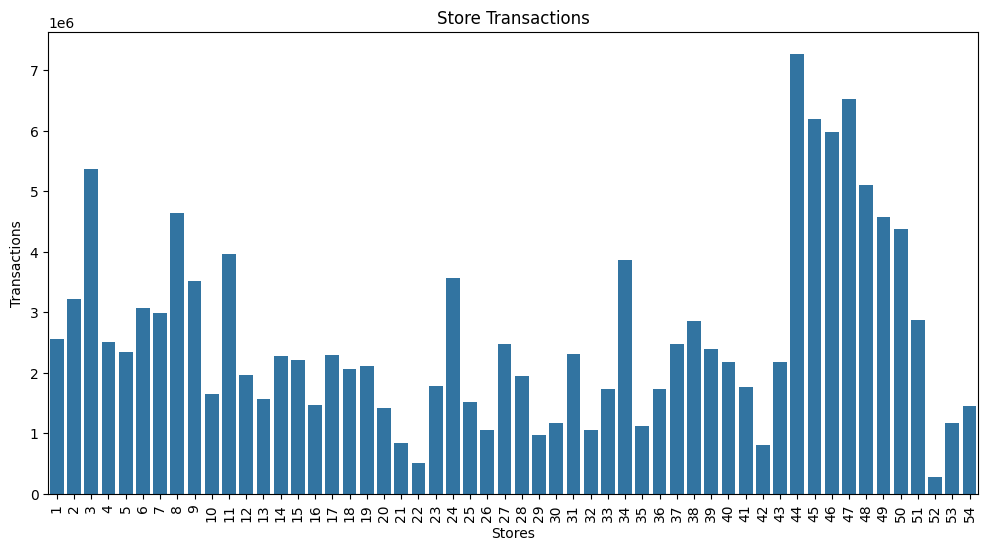

In [6]:
# total trnsactions per store

store_transactions = transaction.groupby('store_nbr')['transactions'].sum().reset_index()

store_transactions.head()
plt.figure(figsize=(12,6))
sns.barplot(x='store_nbr', y='transactions', data= store_transactions)

plt.title('Store Transactions')
plt.xlabel('Stores')
plt.ylabel('Transactions')
plt.xticks(rotation=90)

plt.show()

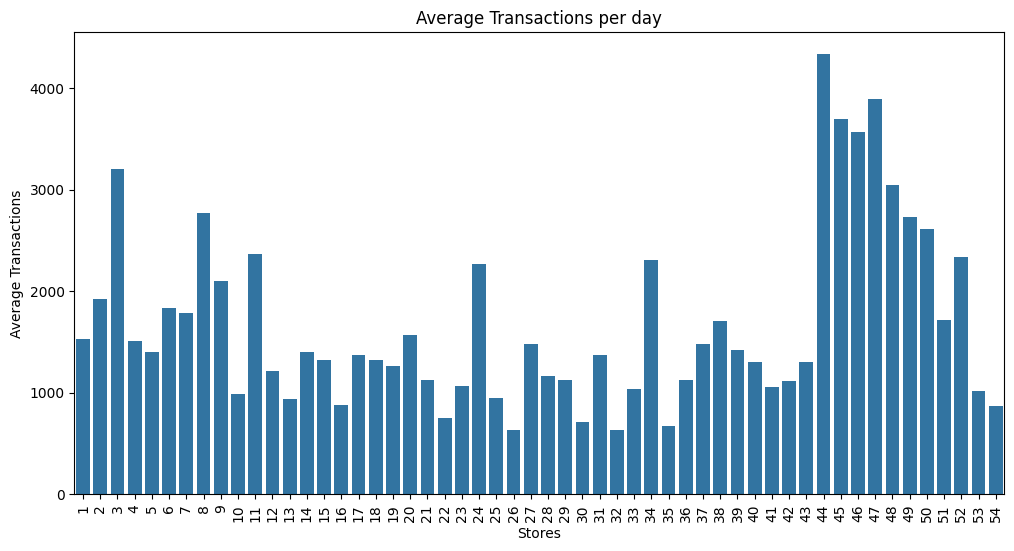

In [7]:
# average transactions per day

avg_transactions = transaction.groupby('store_nbr')['transactions'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='store_nbr', y='transactions', data= avg_transactions)

plt.title('Average Transactions per day')
plt.xlabel('Stores')
plt.ylabel('Average Transactions')
plt.xticks(rotation=90)
plt.show()


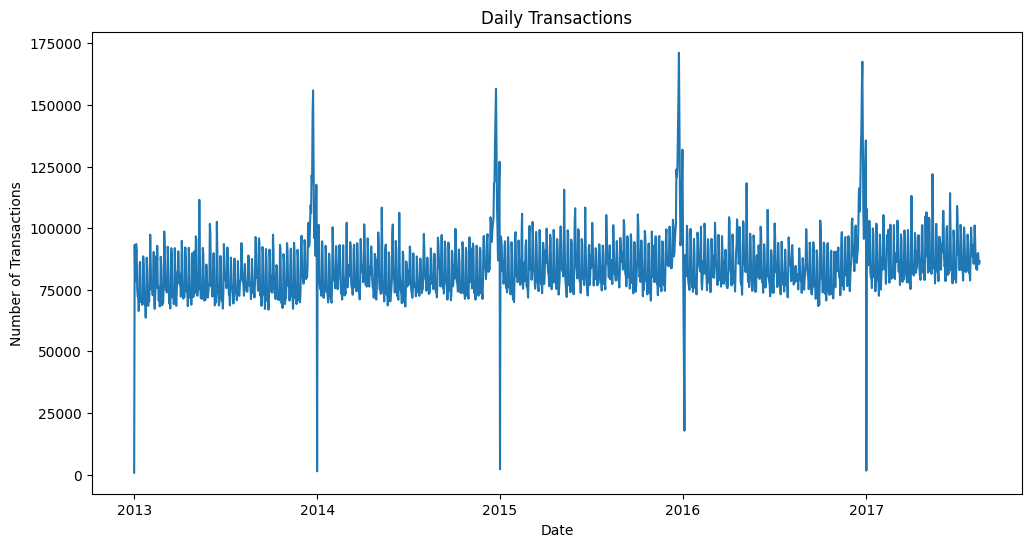

In [30]:
daily_trnsc = transaction.groupby('date', as_index=False)['transactions'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y = 'transactions', data= daily_trnsc)
plt.title('Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

plt.show()

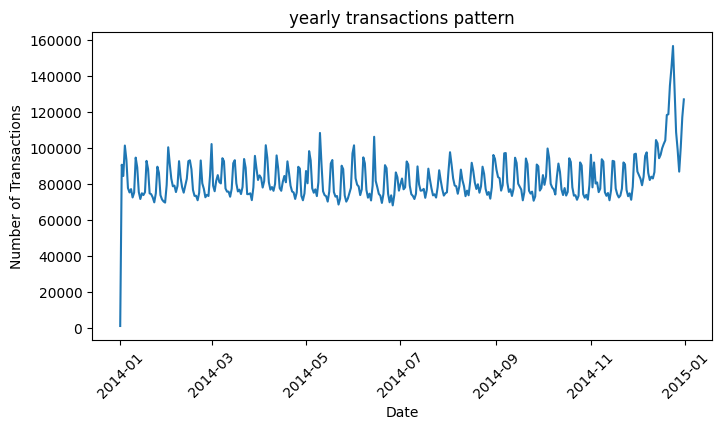

In [39]:
# yearly transactions pattern
plt.figure(figsize=(8,4))
filtered_daily_trnsc = daily_trnsc[(daily_trnsc['date'] >= '2014-01-01') & (daily_trnsc['date'] <= '2014-12-31')]
sns.lineplot(x='date', y='transactions', data=filtered_daily_trnsc)

plt.title('yearly transactions pattern')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

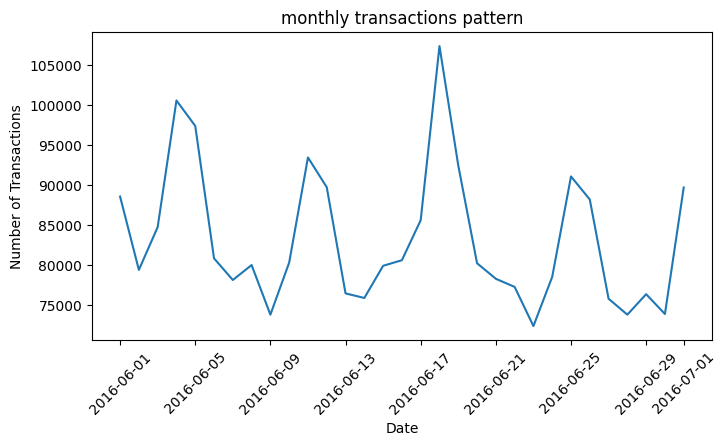

In [41]:
# monthly transaction pattern

plt.figure(figsize=(8,4))
filtered_daily_trnsc = daily_trnsc[(daily_trnsc['date'] >= '2016-06-01') & (daily_trnsc['date'] <= '2016-07-01')]
sns.lineplot(x='date', y='transactions', data=filtered_daily_trnsc)

plt.title('monthly transactions pattern')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

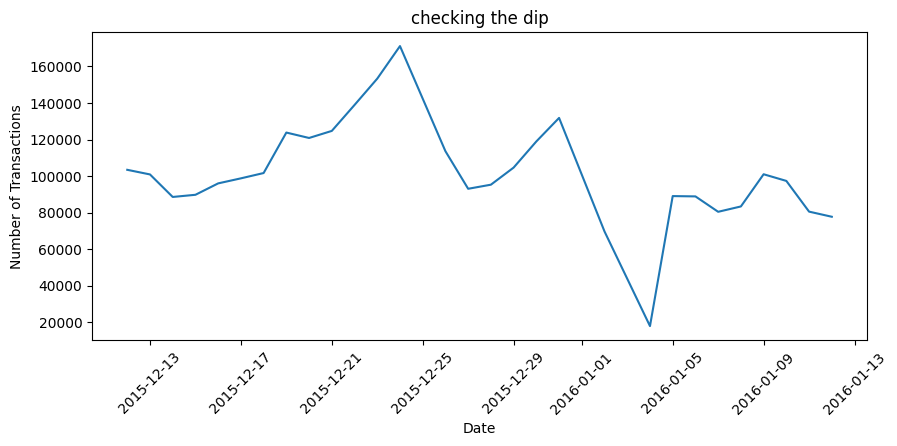

In [42]:
# checking why there is a dip at the beginning of every year 
plt.figure(figsize=(10,4))
filtered_daily_trnsc = daily_trnsc[(daily_trnsc['date'] >= '2015-12-12') & (daily_trnsc['date'] <= '2016-01-12')]
sns.lineplot(x='date', y='transactions', data=filtered_daily_trnsc)

plt.title('checking the dip')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

only logical explaination is probably the stores are closed for new years holiday

In [14]:
dd = daily_trnsc[daily_trnsc['transactions']==0]
dd

,date,transactions


In [19]:
ddf = daily_trnsc[daily_trnsc['date']== '2013-12-31']
ddf

,date,transactions
363,2013-12-31,117214
